In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import xlrd

Step 1: read in data from the .xls file

In [3]:
DATA_FILE = 'data/fire_theft.xls'

book = xlrd.open_workbook(DATA_FILE, encoding_override="utf-8")
sheet = book.sheet_by_index(0) 
data = np.asarray([sheet.row_values(i) for i in range(1, sheet.nrows)]) 
n_samples = sheet.nrows - 1

Step 2: create placeholders for input X (number of fire) and label Y (number of theft)

In [4]:
X = tf.placeholder(tf.float32, name="X")
Y = tf.placeholder(tf.float32, name="Y")

Step 3: create weight and bias, initialized to 0

In [5]:
w = tf.Variable(0.0, name='w')
b = tf.Variable(0.0, name='b')

Step 4: build model to predict Y

In [6]:
Y_predicted = w * X + b

Step 5: use the square error as the loss function

In [7]:
loss = tf.square(Y - Y_predicted)

Step 5a: implement Huber loss function from lecture and try it out

In [8]:
def huber_loss(labels, predictions, delta=1.0):
    residual = tf.abs(predictions - labels)
    condition = tf.less(residual, delta)
    small_res = 0.5 * tf.square(residual)
    large_res = delta * residual - 0.5 * tf.square(delta)
    return tf.where(condition, small_res, large_res)

In [9]:
loss = huber_loss(Y, Y_predicted)

Step 6: using gradient descent with learning rate of 0.01 to minimize loss

In [10]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001).minimize(loss)

In [11]:
sess = tf.Session() # prefer with tf.Session() as sess: in your code

Step 7: initialize the necessary variables, in this case, w and b

In [13]:
sess.run(tf.global_variables_initializer())
writer = tf.summary.FileWriter('./graphs/linear_reg', sess.graph)

Step 8: train the model

In [16]:
for i in range(50): # train the model 50 epochs
    total_loss = 0
    for x, y in data:
        # Session runs train_op and fetch values of loss
        _, l = sess.run([optimizer, loss], feed_dict={X:x, Y:y})
        total_loss += l
    print('Epoch {0}: {1}'.format(i, total_loss/float(n_samples)))

# close the writer when you're done using it
writer.close()

Epoch 0: 15.904357454650814
Epoch 1: 15.897420211961228
Epoch 2: 15.890482980624906
Epoch 3: 15.883546101073513
Epoch 4: 15.876608597258816
Epoch 5: 15.869671116483264
Epoch 6: 15.862734577363534
Epoch 7: 15.855796642291049
Epoch 8: 15.848859967098438
Epoch 9: 15.84192222503147
Epoch 10: 15.834985538651901
Epoch 11: 15.828050191791373
Epoch 12: 15.821113233099735
Epoch 13: 15.814176875798564
Epoch 14: 15.807240405131044
Epoch 15: 15.800304468067008
Epoch 16: 15.793367418715553
Epoch 17: 15.786431504025435
Epoch 18: 15.779495351249352
Epoch 19: 15.772558914807936
Epoch 20: 15.765622773218812
Epoch 21: 15.758686450143744
Epoch 22: 15.751749673104356
Epoch 23: 15.744814201357908
Epoch 24: 15.737877117780348
Epoch 25: 15.730941373555522
Epoch 26: 15.724004460276948
Epoch 27: 15.71706879552498
Epoch 28: 15.710132268091131
Epoch 29: 15.70319555917134
Epoch 30: 15.69625966735406
Epoch 31: 15.689323253452866
Epoch 32: 15.682386567239606
Epoch 33: 15.675450085218818
Epoch 34: 15.668514272874399

Step 9: output the values of w and b

In [17]:
w, b = sess.run([w, b])

Step 10: plot the results

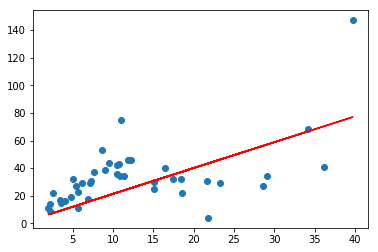

In [18]:
X, Y = data[:, 0], data[:, 1]
plt.scatter(X, Y, label="Real data")
plt.plot(X, w * X + b, label="Predicted data", color='r')
plt.show()